# Using 2017 BoM data to plot and display temperatures and precipitations #

### Step 1 : Importing the libraries ###

In [1]:
import pandas as pd
import matplotlib as mpl

# This line tells the notebook to show plots inside of the notebook
%matplotlib inline


### Step 2 : Importing csv file to display the data ###

In [2]:
#Let's first import and read the data to get a first raw result

df_test = pd.read_csv("weather2017_1H_68241.csv")
print(df_test.head())
                  

           valid_start            valid_end  station_number  T_Celsius  \
0  2017-01-01 00:00:00  2017-01-01 01:00:00           68241       21.5   
1  2017-01-01 01:00:00  2017-01-01 02:00:00           68241       21.6   
2  2017-01-01 02:00:00  2017-01-01 03:00:00           68241       21.5   
3  2017-01-01 03:00:00  2017-01-01 04:00:00           68241       21.1   
4  2017-01-01 04:00:00  2017-01-01 05:00:00           68241       21.0   

   MinT_Celsius  MaxT_Celsius  Precip_mm  
0          21.5          21.8        0.0  
1          21.4          21.6        0.0  
2          21.1          21.5        0.0  
3          20.9          21.2        0.2  
4          20.9          21.1        0.0  


### Step 3 : Try plotting temperatures data without any formatting ###

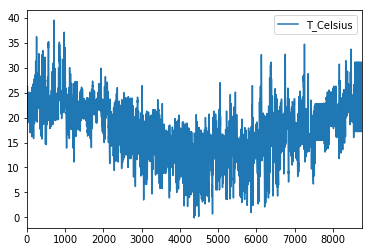

In [3]:
df_test_T=df_test[['valid_start', 'T_Celsius']]
df_test_T.plot()

The resulting graph makes sense with higher temperatures in summer compared to winter. The vertical axis looks fine, however the horizontal axis doesn't display the dates properly. The abundance of data makes the reading of temperatures very confusing. We will need to take the following steps in order to improve the result:

1. Aggregate the data by weeks or month for example
2. Check and correct the horizontal axis format
3. Improve the graph presentation (make it appear bigger for instance)
4. Find a way to show more information on the same graph (min/max T, precipitations)

### Step 4 : Data aggregation and horizontal axis formatting ###

       station_number    T_Celsius  MinT_Celsius  MaxT_Celsius    Precip_mm
count          8760.0  8760.000000   8760.000000   8760.000000  8760.000000
mean          68241.0    17.354361     16.618139     18.125868     0.110320
std               0.0     5.925358      5.951256      5.919208     1.166814
min           68241.0    -0.100000     -0.500000      0.600000     0.000000
25%           68241.0    13.200000     12.500000     14.075000     0.000000
50%           68241.0    17.700000     17.000000     18.300000     0.000000
75%           68241.0    21.600000     21.000000     22.200000     0.000000
max           68241.0    39.500000     35.600000     41.700000    50.000000


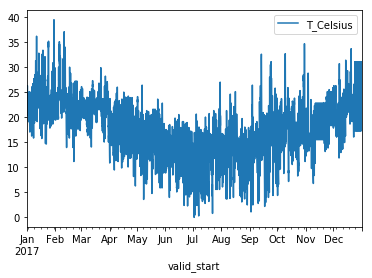

In [6]:
#After some research, we are told that we can parse the dates and set the valid_start column as an index when reading the data

df1=pd.read_csv("weather2017_1H_68241.csv",parse_dates=['valid_start'],
                     index_col='valid_start')

print(df1.describe())

df1_T=df1[['T_Celsius']]
df1_T.plot()

It seems the reading method has helped formatting the horizontal axis better with au automatic display by months.
However the abundance of data remains confusing so we shall now try to group those by week average.

1. Aggregate the data by weeks or month for example -> next step
2. Check and correct the horizontal axis format -> ok


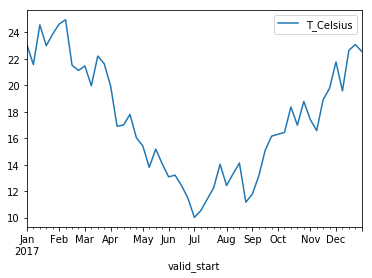

In [7]:
#Having tried a grouping by days & months it seems the grouping by week is a reasonable compromise.

df2=df1.resample('W').mean()
df2_T=df2[['T_Celsius']]
df2_T.plot()

The format is now improved, let's now see what else can be better formatted

1. Aggregate the data by weeks or month for example -> ok
2. Check and correct the horizontal axis format -> ok
3. Improve the graph presentation (make it appear bigger for instance) -> next step


### Step 5 : Improving format of the graph ###